In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [100]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

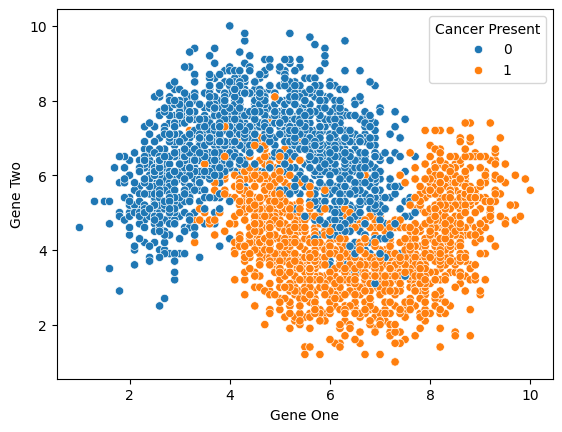

In [101]:
sns.scatterplot(x='Gene One', y='Gene Two', data=df, hue='Cancer Present')

Accuracy is  91.67% and error is  8.33%


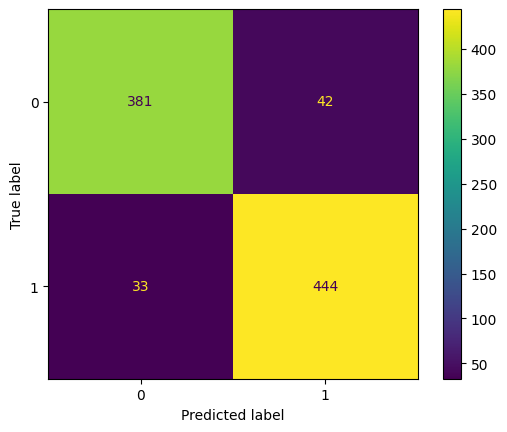

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining X and y
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

# Train Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Scaling Data
# in KNN algorithm our data must be scaled otherwise it will not work properly
# although here numbers are scaled on their own and it's not nedeed but we will do it anyway
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

# Make predictions and Evaluation
y_pred = knn_model.predict(scaled_X_test)

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
accuracy = accuracy_score(y_test, y_pred) 
error = 1 - accuracy
print(f"Accuracy is {accuracy * 100: .2f}% and error is {error * 100: .2f}%")
ConfusionMatrixDisplay.from_estimator(knn_model, scaled_X_test, y_test)


In [103]:
# we can see that we have (42 + 33) mistakes. that means 8% which is a lot
print('error:', (42 + 33)/len(y_test)*100)

error: 8.333333333333332


In [104]:
print(classification_report(y_test, y_pred)) # it seems our model is working fine but it's not

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.91      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



# Finding the best K
1. elbow
2. grid

In [105]:
# Elbow technique
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred = knn_model.predict(scaled_X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    test_error_rates.append(error)

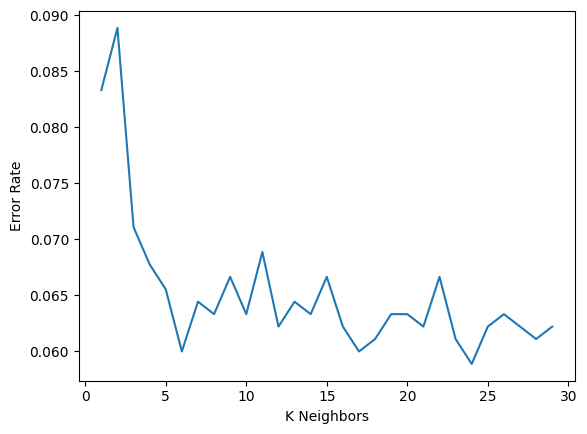

In [106]:
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')
plt.show()
# it seems that around k=5 , the error rate is the lowest and we must choose that

In [107]:
# Gridding
scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [108]:
knn.get_params().keys() # these are the parameters that KNN algorithm can take in

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [109]:
operation = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operation) 

In [110]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1, 30))

# when we use pipelines we must name our parameters like this.. (the string name we gave in operation)
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [111]:
full_cv_classifier.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [121]:
full_cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=27))])>

In [113]:
full_pred = full_cv_classifier.predict(scaled_X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



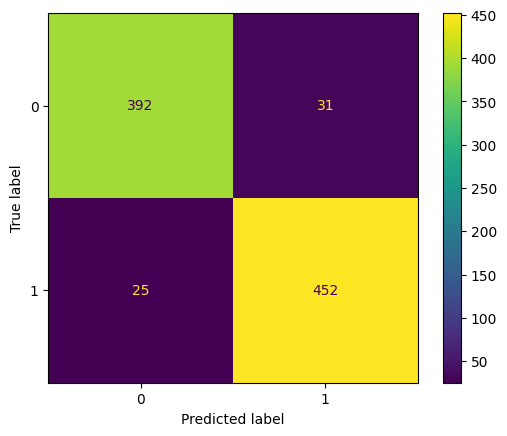

In [114]:
ConfusionMatrixDisplay.from_estimator(full_cv_classifier, scaled_X_test, y_test)

In [115]:
error = (1 - accuracy_score(y_test, full_pred)) * 100
print(f'{error: .2f}%')

 6.22%


In [116]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train, y_train)

y_pred_5 = knn_model.predict(scaled_X_test)
error5 = (1 - accuracy_score(y_test, y_pred_5)) * 100
print(f'{error5: .2f}%')

 6.56%


In [122]:
new_patient = [[3.8, 6.4]]
print(knn_model.predict(new_patient))
print(knn_model.predict_proba(new_patient)) # it says 80% 0 and 20% 1 

[0]
[[0.8 0.2]]
